In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from subprocess import check_output
print(check_output(["ls", "../_data/"]).decode("utf8"))

ecommerce-transaction-data.csv



In [9]:
df_raw = pd.read_csv(
    "../_data/ecommerce-transaction-data.csv", 
    encoding="ISO-8859-1"
)

In [18]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [20]:
df_raw.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [42]:
df = df_raw.copy()

# 1. Data preparation

## 1.1 Datatypes

In [43]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y %H:%M")

In [44]:
df['CustomerID'] = pd.to_numeric(df['CustomerID'])

## 1.2 Feature engineering

#### Cancelled orders

In [47]:
df['Cancelled'] = df['InvoiceNo'].str.startswith('C')

#### Break down invoice dates
Breaking down invoice dates into their components for further analysis later

In [45]:
df['yearmonth'] = df['InvoiceDate'].apply(lambda x: (100*x.year) + x.month)
df['week'] = df['InvoiceDate'].apply(lambda x: x.strftime('%W'))
df['day'] = df['InvoiceDate'].apply(lambda x: x.strftime('%d'))
df['hour'] = df['InvoiceDate'].apply(lambda x: x.strftime('%H'))
df['weekday'] = df['InvoiceDate'].apply(lambda x: x.strftime('%w'))


# 2. Exploratory data analysis

https://python-graph-gallery.com/123-highlight-a-line-in-line-plot/

https://seaborn.pydata.org/tutorial/aesthetics.html

In [167]:
sns.set() # resets to default seaborn style

axes_settings ={
    
    'axes.titlepad' : 80.0,
    'axes.labelpad' : 50.0, # axes label / title
    
    #'axes.spines.left'  : True, 
    #'axes.spines.bottom': True,
    #'axes.spines.top'   : False,
    #'axes.spines.Right ': False,
    
    'axes.xmargin': 0.05,
    'axes.ymargin': 0.05,
    
    "axes.facecolor": "1.0",
    'axes.labelsize': 15,
    'ytick.major.size': 5.5
}


sns.set(
    style = 'ticks',
    palette = 'muted',
    font_scale = 1.5,
    rc = axes_settings
)

# removes top and right border - Add the line to every graph
#sns.despine(offset=10, left=False, bottom=False) 

#sns.set(color_codes=False)

## 2.X Customers

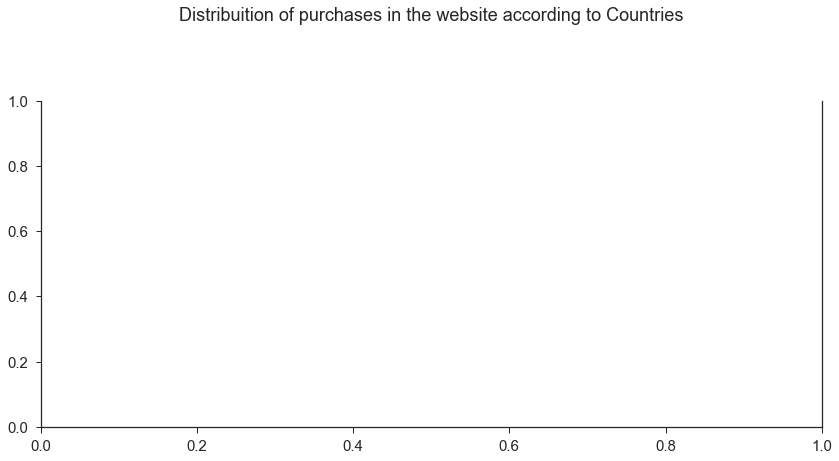

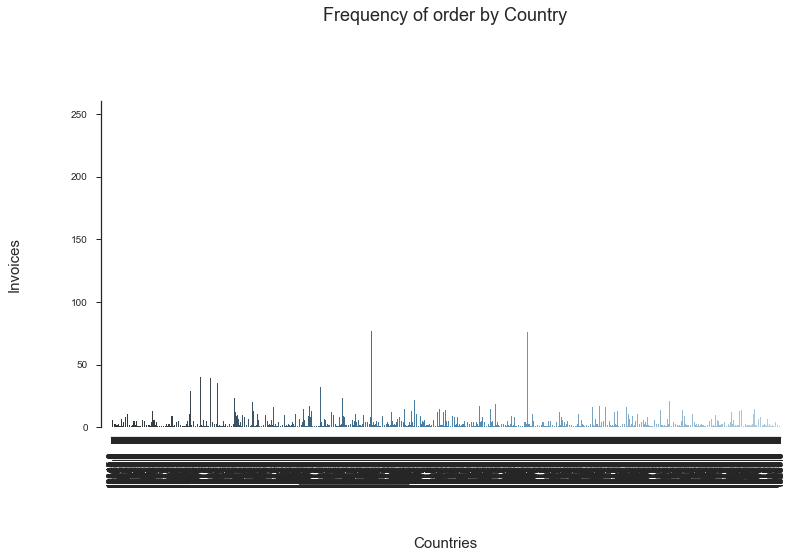

In [186]:
df_invoice_group = df.groupby('CustomerID')['InvoiceNo'].nunique()
df_invoice_group = pd.DataFrame(df_invoice_group)

plt.figure(figsize=(12,6))
ax = sns.barplot(df_invoice_group.index.values, df_invoice_group.InvoiceNo, estimator=sum, palette="Blues_d")

sns.despine(offset=10, left=False, bottom=False) # removes top and right border

ax.set_title('Frequency of order by Country')
ax.set_ylabel('Invoices')
ax.set_xlabel('Countries')

plt.yticks(size=10)
plt.xticks(size=10, rotation=90)
plt.show()

## 2.1 Invoices

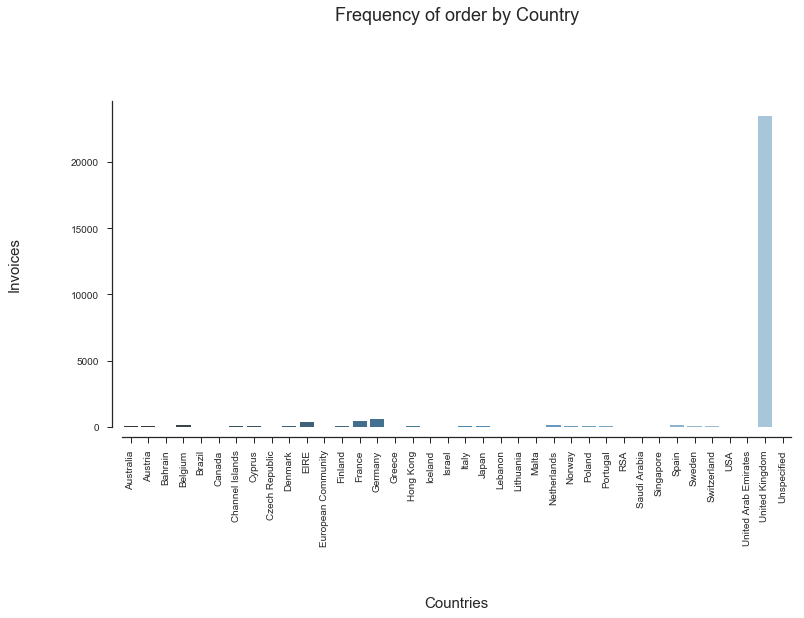

In [184]:
df_invoice_group = df.groupby('Country')['InvoiceNo'].nunique()
df_invoice_group = pd.DataFrame(df_invoice_group)

plt.figure(figsize=(12,6))
ax = sns.barplot(df_invoice_group.index.values, df_invoice_group.InvoiceNo, estimator=sum, palette="Blues_d")

sns.despine(offset=10, left=False, bottom=False) # removes top and right border

ax.set_title('Frequency of order by Country')
ax.set_ylabel('Invoices')
ax.set_xlabel('Countries')

plt.yticks(size=10)
plt.xticks(size=10, rotation=90)
plt.show()

#### Number Invoice per months
Invoices are grouped by YearMonth

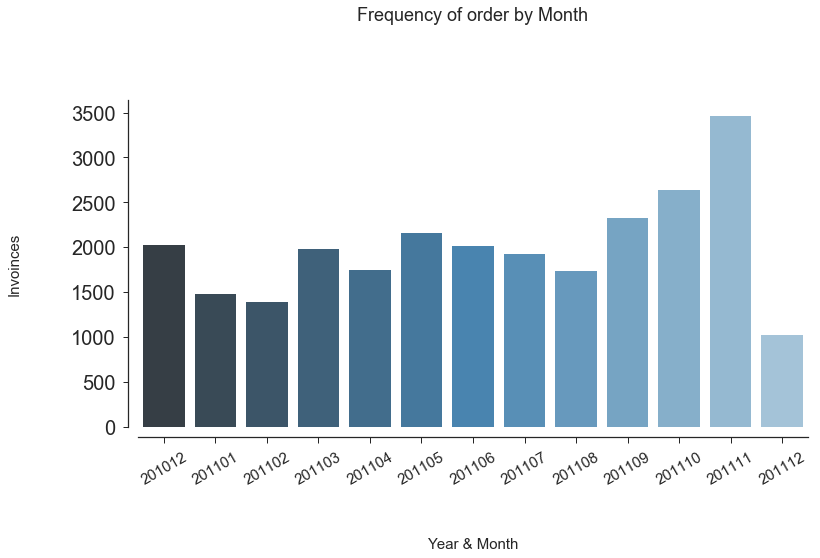

In [166]:
df_invoice_group = df.groupby('yearmonth')['InvoiceNo'].nunique()
df_invoice_group = pd.DataFrame(df_invoice_group)

plt.clf()

plt.figure(figsize=(12,6))
ax = sns.barplot(test.index.values, test.InvoiceNo, estimator=sum, palette="Blues_d")

sns.despine(offset=10, left=False, bottom=False) # removes top and right border

ax.set_title('Frequency of order by Month')
ax.set_ylabel('Invoinces')
ax.set_xlabel('Year & Month')

plt.xticks(rotation=30, size=15)
plt.yticks(size=20)
plt.show()

#### Number Invoice per week

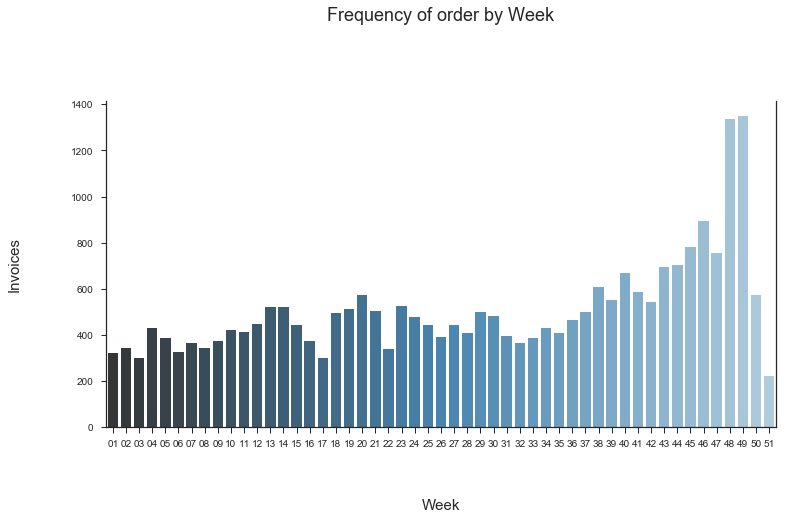

In [130]:
df_invoice_group = df.groupby('week')['InvoiceNo'].nunique()
df_invoice_group = pd.DataFrame(df_invoice_group)

plt.figure(figsize=(12,6))
ax = sns.barplot(df_invoice_group.index.values, df_invoice_group.InvoiceNo, estimator=sum, palette="Blues_d")

ax.set_title('Frequency of order by Week')
ax.set_ylabel('Invoices')
ax.set_xlabel('Week')

plt.yticks(size=10)
plt.xticks(size=10)
plt.show()

#### Number Invoice per day

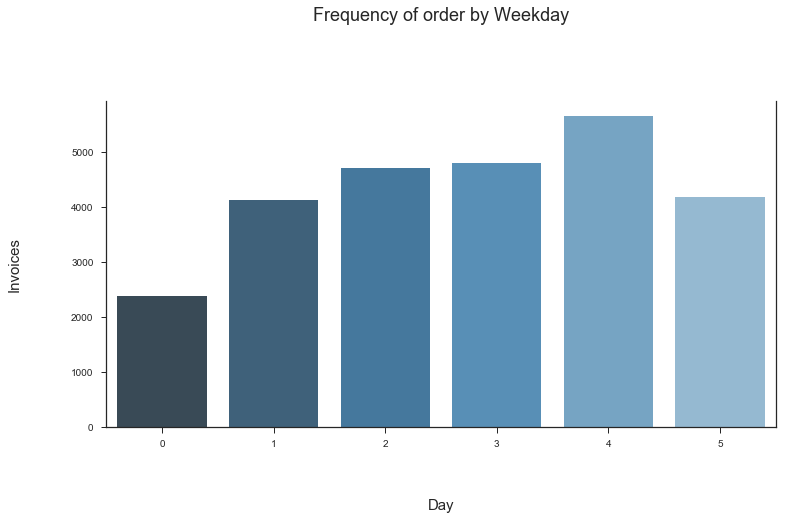

In [132]:
df_invoice_group = df.groupby('weekday')['InvoiceNo'].nunique()
df_invoice_group = pd.DataFrame(df_invoice_group)

plt.figure(figsize=(12,6))
ax = sns.barplot(df_invoice_group.index.values, df_invoice_group.InvoiceNo, estimator=sum, palette="Blues_d")

ax.set_title('Frequency of order by Weekday')
ax.set_ylabel('Invoices')
ax.set_xlabel('Day')

plt.yticks(size=10)
plt.xticks(size=10)
plt.show()

#### Number Invoice by hour

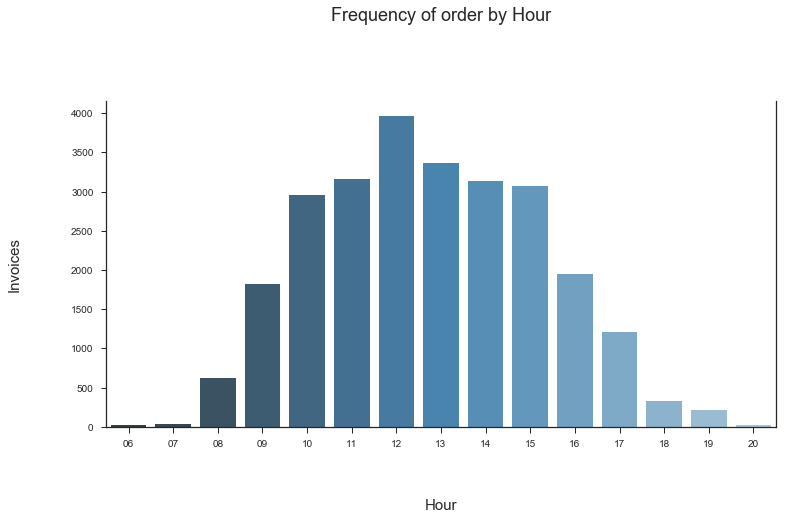

In [135]:
df_invoice_group = df.groupby('hour')['InvoiceNo'].nunique()
df_invoice_group = pd.DataFrame(df_invoice_group)

plt.figure(figsize=(12,6))
ax = sns.barplot(df_invoice_group.index.values, df_invoice_group.InvoiceNo, estimator=sum, palette="Blues_d")

ax.set_title('Frequency of order by Hour')
ax.set_ylabel('Invoices')
ax.set_xlabel('Hour')

plt.yticks(size=10)
plt.xticks(size=10)
plt.show()